# **METÓDOS DAS DIFERENÇAS FINITAS** 

PROBLEMAS DE CONTORNO


# Condição de Robin
Tenho aqui o meu vetor com h=0.25

| i |  x  | y |      
| --- | --- | --- |  
| 0 | 0.00 | -1  |
| 1 | 0.25 |     |
| 2 | 0.50 |     |
| 3 | 0.75 |     |
| 4 | 1.00 |     |
| 5 | 1.25 |     |

E, dado:
y'(1.25) = 1  e   y (0) = -1

# Condição de Dirichlet

| i |  x  | y |      
| --- | --- | --- |  
| 0 | 0.00 |  1  |
| 1 | 0.25 |     |
| 2 | 0.50 |     |
| 3 | 0.75 |     |
| 4 | 1.00 |     |
| 5 | 1.25 | -1  |

E, dado:
y(0) = 1   e   y(1.25) = -1

# Condição de Newman
| i |  x  | y |      
| --- | --- | --- |  
| 0 | 0.00 |     |
| 1 | 0.25 |     |
| 2 | 0.50 |     |
| 3 | 0.75 |     |
| 4 | 1.00 |     |
| 5 | 1.25 |     |

E, dado:
y'(0) = 1   e   y'(1.25) = -1

In [27]:
from sympy import symbols, IndexedBase, Sum, Eqn, simplify
import numpy as np
from algebra_with_sympy import *
from functions_algebricmanipulations import*


In [28]:
i, h, z = symbols('i h z')
y = IndexedBase('y')
x = IndexedBase('x')

yll = Eqn(y[i] ,(y[i+1]-2*y[i]+y[i-1])/(h**2)) 
ylprog = Eqn(y[i],((y[i+1]-y[i])/h))
ylregr = Eqn(y[i],((y[i]-y[i-1])/h))
ylcent = Eqn(y[i],((y[i+1]-y[i-1])/(2*h)))

display(yll, ylprog, ylregr, ylcent)


Equation(y[i], (y[i + 1] + y[i - 1] - 2*y[i])/h**2)

Equation(y[i], (y[i + 1] - y[i])/h)

Equation(y[i], (-y[i - 1] + y[i])/h)

Equation(y[i], (y[i + 1] - y[i - 1])/(2*h))

**Discretizando**

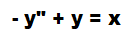

In [29]:
edo = Eqn(-yll.rhs + y[i], x[i])  #pegando o lado direito da equação yll e aplicando na função
edo = simplify(edo)*h**2
# Agrupando os elementos em comum
common_y_terms = edo.lhs.collect(y[i])
remaining_terms = edo.rhs

# Equação discretizada final
eq_geral = Eq(common_y_terms, remaining_terms)
eq_geral

Eq((h**2 + 2)*y[i] - y[i + 1] - y[i - 1], h**2*x[i])

In [30]:
eq = criaEq(eq_geral)
for i in range(1,len(eq)+1):
     display(eq[i])


Eq((h**2 + 2)*y[1] - y[0] - y[2], h**2*x[1])

Eq((h**2 + 2)*y[2] - y[1] - y[3], h**2*x[2])

Eq((h**2 + 2)*y[3] - y[2] - y[4], h**2*x[3])

Eq((h**2 + 2)*y[4] - y[3] - y[5], h**2*x[4])

In [31]:
#Meus vetores
y0 = 1
y1 = -1
xv  = [0, 0.25, 0.50, 0.75, 1, 1.25]
yv  = [1, nan, nan, nan, nan,-1]

# Aplicando o método de Robin

1 ponto e 1 derivada

Substituindo o valor de y{0} e y'{1}:

In [32]:
n = len(xv)-1
eq[1] = ponto1(yv, eq, 1)
eq[n] = eqF(eq, y1,ylregr)

for k in range(1, len(eq)):
    display(eq[k])

Eq((h**2 + 2.0)*y[1] - y[2], h**2*x[1] + 1)

Eq((h**2 + 2)*y[2] - y[1] - y[3], h**2*x[2])

Eq((h**2 + 2)*y[3] - y[2] - y[4], h**2*x[3])

Eq((h**2 + 1)*y[4] - y[3], h**2*x[4] + h)

#COLOCANDO NA MATRIZ

In [33]:
Ar, Br= matriz(eq)
display(Matrix(Ar))
display(Matrix(Br))

Matrix([
[h**2 + 2.0,       -1,        0,        0],
[        -1, h**2 + 2,       -1,        0],
[         0,       -1, h**2 + 2,       -1],
[         0,        0,       -1, h**2 + 1]])

Matrix([
[h**2*x[1] + 1],
[    h**2*x[2]],
[    h**2*x[3]],
[h**2*x[4] + h]])

In [34]:
matrizRobin = matriz_aumentada(Ar,Br,xv)
print("Matriz Aumentada")
display(Matrix(matrizRobin))

Matriz Aumentada


Matrix([
[2.0625,     -1,      0,      0, 1.015625],
[    -1, 2.0625,     -1,      0,  0.03125],
[     0,     -1, 2.0625,     -1, 0.046875],
[     0,      0,     -1, 1.0625,   0.3125]])

In [35]:
from thomas_system_solve import thomas
print("SOLUÇÃO ROBIN")
thomas(matrizRobin)


SOLUÇÃO ROBIN
x 1 = 0.5318
x 2 = 0.0812
x 3 = 0.0656
x 4 = 0.0


# Aplicando para Dirichlet
2 pontos

Substituindo o valor de y{0} e y{1}:

In [36]:
eq = criaEq(eq_geral) #zerando as equações
n = len(xv)-1
eq[1] = ponto1(yv, eq, 1)
eq[n] = ponto2(yv, eq,yv[n])

Ad, Bd= matriz(eq)

matrizDirichlet = matriz_aumentada(Ad,Bd,xv)
print("SOLUÇÃO DIRICHLET")
thomas(matrizDirichlet)    
    

SOLUÇÃO DIRICHLET
x 1 = 0.5318
x 2 = 0.0812
x 3 = 0.0656
x 4 = 0.0


# Aplicando para Newman
2 derivadas


In [37]:
eq = criaEq(eq_geral) #zerando as equações
n = len(xv)-1
eq[1] = eq1(eq, y0,ylprog)
eq[n] = eqF(eq, y1,ylregr)

An, Bn= matriz(eq)

matrizNewman = matriz_aumentada(An,Bn,xv)
print("SOLUÇÃO NEWMAN")
thomas(matrizNewman)  

SOLUÇÃO NEWMAN
x 1 = 0.3697
x 2 = 0.1272
x 3 = 0.0801
x 4 = 0.0


# MOSTRANDO OS RESULTADOS DOS 3 MÉTODOS

In [38]:
print("----------------- ROBIN ------------------------")

display(Matrix(Ar))
display(Matrix(Br))
thomas(matrizRobin)  

print("----------------- DIRICHLET ------------------------")

display(Matrix(Ad))
display(Matrix(Bd))
thomas(matrizDirichlet)  

print("----------------- NEWMAN ------------------------")

display(Matrix(An))
display(Matrix(Bn))
thomas(matrizNewman)  

----------------- ROBIN ------------------------


Matrix([
[h**2 + 2.0,       -1,        0,        0],
[        -1, h**2 + 2,       -1,        0],
[         0,       -1, h**2 + 2,       -1],
[         0,        0,       -1, h**2 + 1]])

Matrix([
[h**2*x[1] + 1],
[    h**2*x[2]],
[    h**2*x[3]],
[h**2*x[4] + h]])

x 1 = 0.5318
x 2 = 0.0812
x 3 = 0.0656
x 4 = 0.0
----------------- DIRICHLET ------------------------


Matrix([
[h**2 + 2.0,         -1,          0,          0],
[        -1, h**2 + 2.0,         -1,          0],
[         0,         -1, h**2 + 2.0,         -1],
[         0,          0,         -1, h**2 + 2.0]])

Matrix([
[h**2*x[1] + 1.0],
[      h**2*x[2]],
[      h**2*x[3]],
[  h**2*x[4] - 1]])

x 1 = 0.5318
x 2 = 0.0812
x 3 = 0.0656
x 4 = 0.0
----------------- NEWMAN ------------------------


Matrix([
[h**2 + 1,       -1,        0,        0],
[      -1, h**2 + 2,       -1,        0],
[       0,       -1, h**2 + 2,       -1],
[       0,        0,       -1, h**2 + 1]])

Matrix([
[h**2*x[1] + h],
[    h**2*x[2]],
[    h**2*x[3]],
[h**2*x[4] + h]])

x 1 = 0.3697
x 2 = 0.1272
x 3 = 0.0801
x 4 = 0.0
